# Подгружаем необходимые библиотеки и датасет


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV,KFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
df_train = pd.read_csv('wine_train.csv') 
df_train['quality']=(df_train['quality']>6).astype(int)
X=df_train.iloc[:,:-1].values
y=df_train['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True, stratify=y)

# Grid Search

In [2]:
f1score = make_scorer(f1_score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, minmax_scale, Normalizer, QuantileTransformer, PowerTransformer
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('fitch',PolynomialFeatures()),
                 ('classifier', RandomForestClassifier(random_state=0))])

fitch_degree = [1,2,3]
param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer(), QuantileTransformer(), PowerTransformer()],
     'fitch': [PolynomialFeatures()],
     'fitch__degree': fitch_degree,
     'classifier': [RandomForestClassifier(random_state=0)],
     "classifier__max_depth": [3,10, None],
              "classifier__max_features": [1, 3,5, 10],
              "classifier__min_samples_split": [ 3,5, 10],
              "classifier__min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              "classifier__criterion": ["gini", "entropy"],
    }]


grid= GridSearchCV(pipe, param_grid, return_train_score=True, iid=True,n_jobs=-1,scoring=f1score)
grid.fit(X_train,y_train)
grid_results=pd.DataFrame(grid.cv_results_)
grid_results[grid_results['rank_test_score']==1].T

C:\Users\Yana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Yana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,3170
mean_fit_time,0.0769661
std_fit_time,0.00370726
mean_score_time,0.0043563
std_score_time,0.000510372
param_classifier,"(DecisionTreeClassifier(class_weight=None, cri..."
param_classifier__criterion,entropy
param_classifier__max_depth,10
param_classifier__max_features,10
param_classifier__min_samples_leaf,3
param_classifier__min_samples_split,10


# Тест

Правильность для наилучшей модели на тестовом наборе: 0.716418



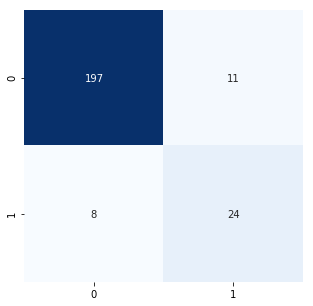

In [3]:
predict = (grid.predict_proba(X_test)[:,1]>=0.3).astype(bool)
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(f1_score(predict,y_test)))

matrix_1=confusion_matrix(y_test,predict)
fig,ax = plt.subplots(1, sharex=True, sharey=True, figsize=(5,5))
ax = sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
plt.show()